In [1]:
import numpy as np              # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

In [2]:
foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.
snap = 'RD0030'

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"

In [3]:
track_dir = code_path + 'halo_infos/008508/nref11c_nref9f/'
track_name = code_path + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
# This puts together all the paths to get the full path to the simulation output that the code needs
snap_name = foggie_dir + snap + '/' + snap

# Now load in the simulation output. If you've looked at the yt documentation, you'll notice this looks
# very similar to the 'ds = yt.load(..)' step there. We wrote our own version of the load function
# designed just for FOGGIE, so you'll want to use this instead.
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)

Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/RD0030/RD0030


yt : [INFO     ] 2023-06-09 09:28:36,141 Parameters: current_time              = 342.59335094489
yt : [INFO     ] 2023-06-09 09:28:36,142 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-06-09 09:28:36,142 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-09 09:28:36,143 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-09 09:28:36,144 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-09 09:28:36,145 Parameters: current_redshift          = 0.69999998985822
yt : [INFO     ] 2023-06-09 09:28:36,146 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-06-09 09:28:36,147 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-06-09 09:28:36,148 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-06-09 09:28:36,149 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:       col1         col2     col3     col4     col5     col6     col7   col8
---------------- -------- -------- -------- -------- -------- -------- ----
0.70010142384376 0.490906 0.479166 0.504685 0.492906 0.481166 0.506685    9


Parsing Hierarchy : 100%|████████████████| 5804/5804 [00:00<00:00, 10636.31it/s]
yt : [INFO     ] 2023-06-09 09:28:36,927 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


yt : [INFO     ] 2023-06-09 09:28:53,899 Projection completed
yt : [INFO     ] 2023-06-09 09:28:53,900 xlim = 40626.535060 40646.535060
yt : [INFO     ] 2023-06-09 09:28:53,900 ylim = 42791.210301 42811.210301
yt : [INFO     ] 2023-06-09 09:28:53,901 xlim = 0.480003 0.480239
yt : [INFO     ] 2023-06-09 09:28:53,902 ylim = 0.505578 0.505814
yt : [INFO     ] 2023-06-09 09:28:53,905 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



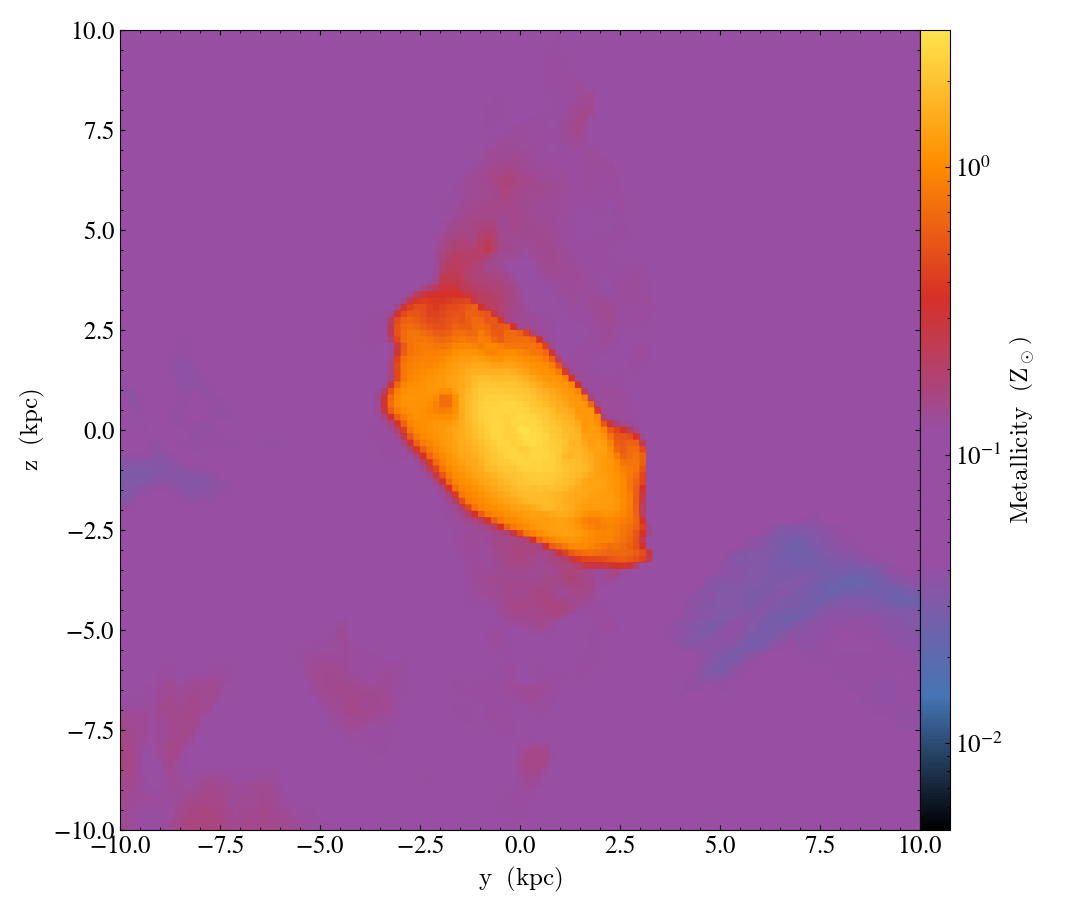

In [4]:
proj = yt.ProjectionPlot(ds, "x", "metallicity", center=ds.halo_center_kpc, width=(20., 'kpc'), data_source=refine_box,
                         weight_field="density")
# Notice the additional argument "weight_field". This will make a projection of gas temperature weighted
# by gas density.
proj.set_cmap('metallicity', metal_color_map)
proj.set_zlim('metallicity', metal_min, metal_max)
#proj.save(foggie_dir_output + snap + '/' +snap +'_metallicity_projection.png')

yt : [INFO     ] 2023-06-09 09:29:00,436 Projection completed
yt : [INFO     ] 2023-06-09 09:29:00,437 xlim = 42791.210301 42811.210301
yt : [INFO     ] 2023-06-09 09:29:00,438 ylim = 41621.940201 41641.940201
yt : [INFO     ] 2023-06-09 09:29:00,440 xlim = 0.505578 0.505814
yt : [INFO     ] 2023-06-09 09:29:00,441 ylim = 0.491763 0.492000
yt : [INFO     ] 2023-06-09 09:29:00,442 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



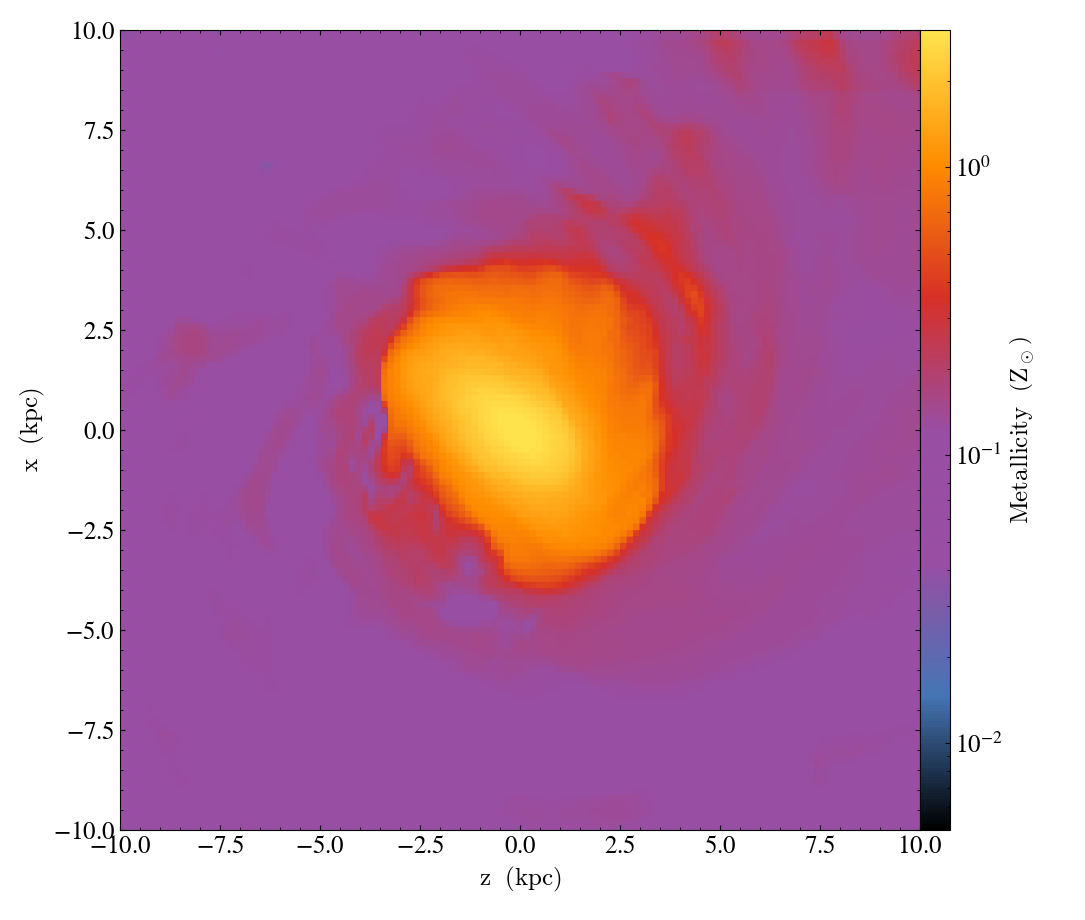

In [5]:
proj2 = yt.ProjectionPlot(ds, "y", "metallicity", center=ds.halo_center_kpc, width=(20., 'kpc'), data_source=refine_box,
                         weight_field="density")
# Notice the additional argument "weight_field". This will make a projection of gas temperature weighted
# by gas density.
proj2.set_cmap('metallicity', metal_color_map)
proj2.set_zlim('metallicity', metal_min, metal_max)
#proj.save(foggie_dir_output + snap + '/' +snap +'_metallicity_projection.png')

yt : [INFO     ] 2023-06-09 10:19:05,116 Projection completed
yt : [INFO     ] 2023-06-09 10:19:05,116 xlim = 41531.940201 41731.940201
yt : [INFO     ] 2023-06-09 10:19:05,117 ylim = 40536.535060 40736.535060
yt : [INFO     ] 2023-06-09 10:19:05,118 xlim = 0.490700 0.493063
yt : [INFO     ] 2023-06-09 10:19:05,119 ylim = 0.478939 0.481302
yt : [INFO     ] 2023-06-09 10:19:05,120 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



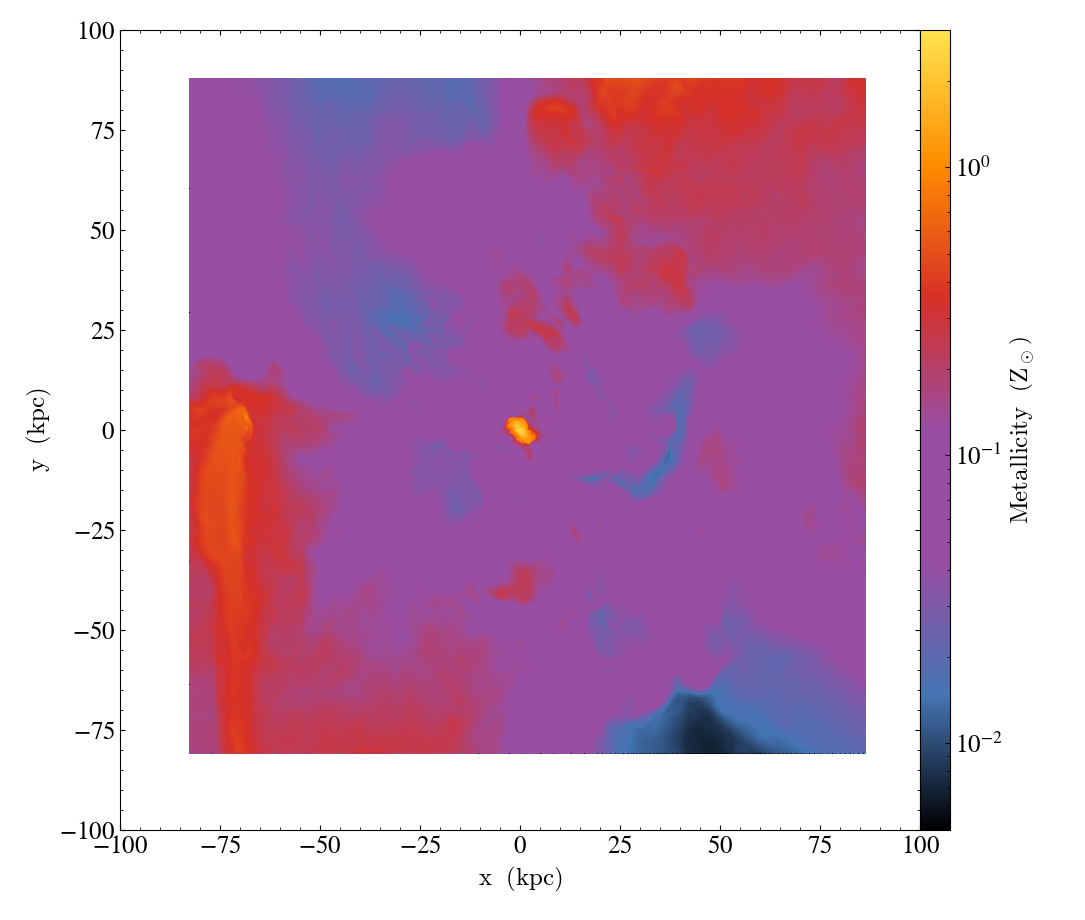

In [40]:
proj3 = yt.ProjectionPlot(ds, "z", "metallicity", center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box, weight_field="density")
proj3.set_cmap('metallicity', metal_color_map)
proj3.set_zlim('metallicity', metal_min, metal_max)
#proj.save(foggie_dir_output + snap + '/' +snap +'_metallicity_projection.png')

yt : [INFO     ] 2023-06-09 09:29:21,632 Projection completed
yt : [INFO     ] 2023-06-09 09:29:21,633 xlim = 40536.535060 40736.535060
yt : [INFO     ] 2023-06-09 09:29:21,633 ylim = 42701.210301 42901.210301
yt : [INFO     ] 2023-06-09 09:29:21,634 xlim = 0.478939 0.481302
yt : [INFO     ] 2023-06-09 09:29:21,635 ylim = 0.504515 0.506878
yt : [INFO     ] 2023-06-09 09:29:21,636 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



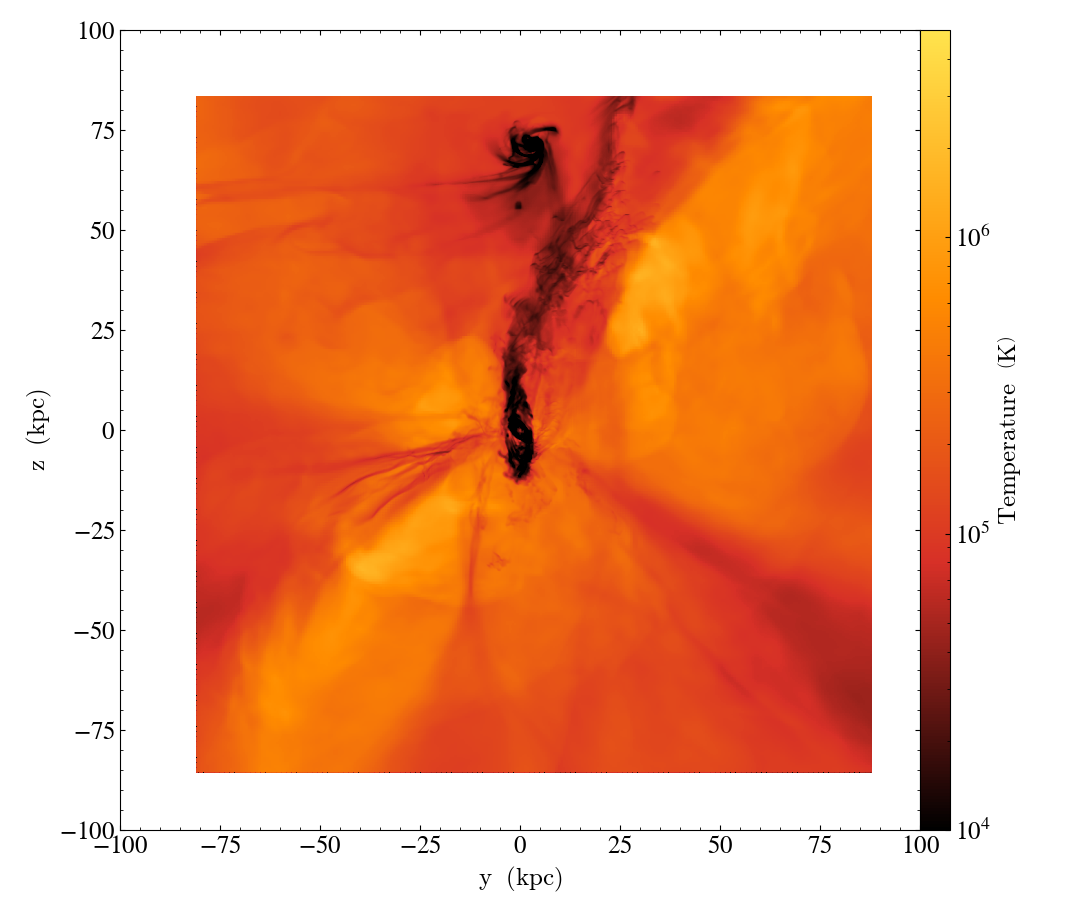

In [7]:
proj = yt.ProjectionPlot(ds, "x", "temperature", center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box,
                         weight_field="density")
# Notice the additional argument "weight_field". This will make a projection of gas temperature weighted
# by gas density.
proj.set_cmap('temperature', temperature_color_map)
proj.set_zlim('temperature', temperature_min, temperature_max)

yt : [INFO     ] 2023-06-09 10:13:47,598 Projection completed
yt : [INFO     ] 2023-06-09 10:13:47,599 xlim = 42701.210301 42901.210301
yt : [INFO     ] 2023-06-09 10:13:47,599 ylim = 41531.940201 41731.940201
yt : [INFO     ] 2023-06-09 10:13:47,600 xlim = 0.504515 0.506878
yt : [INFO     ] 2023-06-09 10:13:47,601 ylim = 0.490700 0.493063
yt : [INFO     ] 2023-06-09 10:13:47,604 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



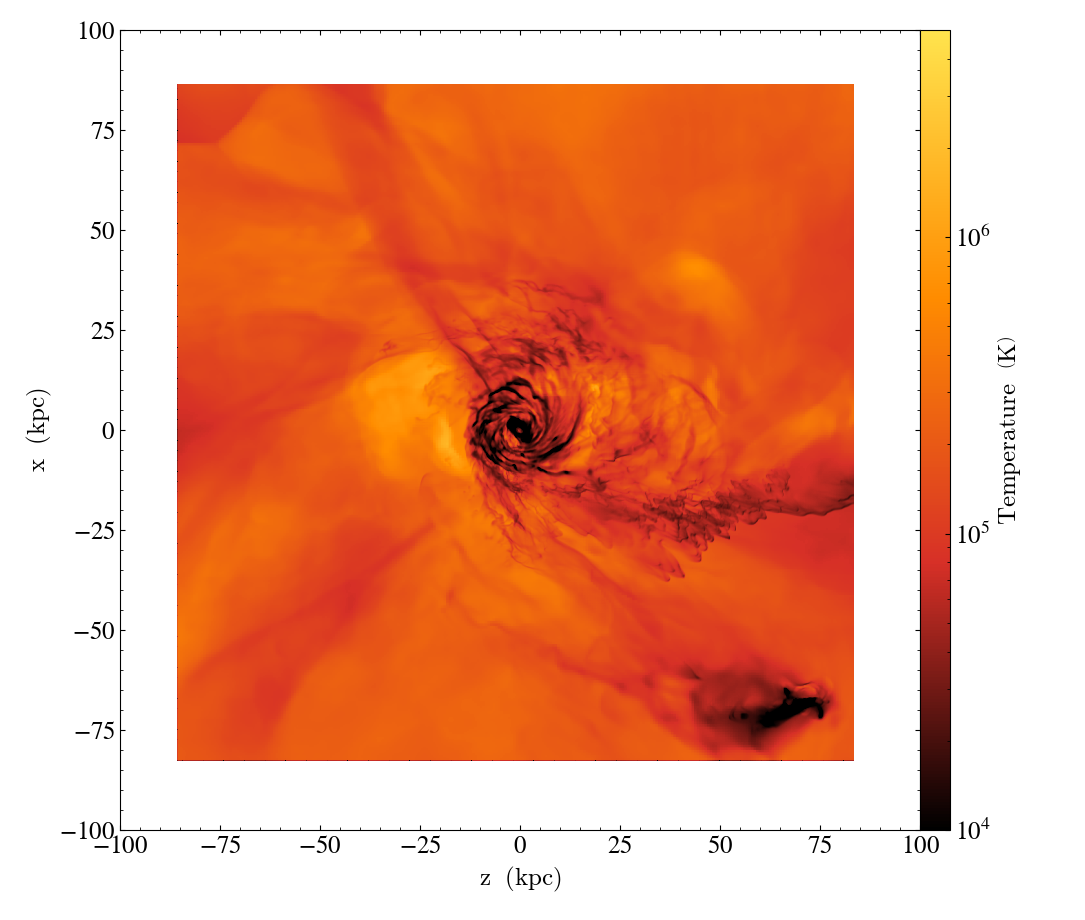

In [36]:
proj = yt.ProjectionPlot(ds, "y", "temperature", center=ds.halo_center_kpc,  width=(200., 'kpc'), data_source=refine_box, weight_field="density")
proj.set_cmap('temperature', temperature_color_map)
proj.set_zlim('temperature', temperature_min, temperature_max)

yt : [INFO     ] 2023-06-09 10:02:57,933 Projection completed
yt : [INFO     ] 2023-06-09 10:02:57,933 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-09 10:02:57,934 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-09 10:02:57,935 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-06-09 10:02:57,935 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-06-09 10:02:57,937 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



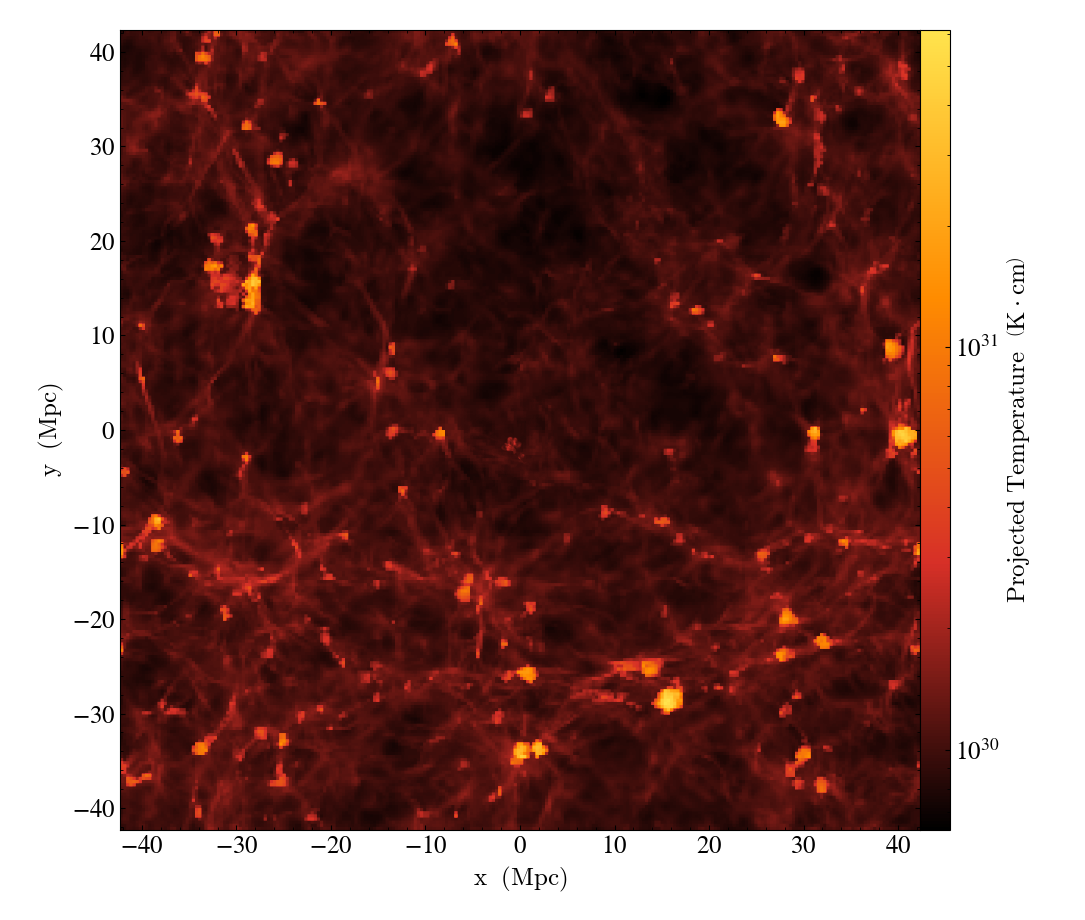

In [27]:
proj = yt.ProjectionPlot(ds,"z","temperature")
proj.set_cmap('temperature', temperature_color_map)


yt : [INFO     ] 2023-06-09 09:57:45,693 Projection completed
yt : [INFO     ] 2023-06-09 09:57:45,694 xlim = -687.145959 83951.026362
yt : [INFO     ] 2023-06-09 09:57:45,694 ylim = -1682.551100 82955.621221
yt : [INFO     ] 2023-06-09 09:57:45,696 xlim = -0.008119 0.991881
yt : [INFO     ] 2023-06-09 09:57:45,696 ylim = -0.019879 0.980121
yt : [INFO     ] 2023-06-09 09:57:45,698 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



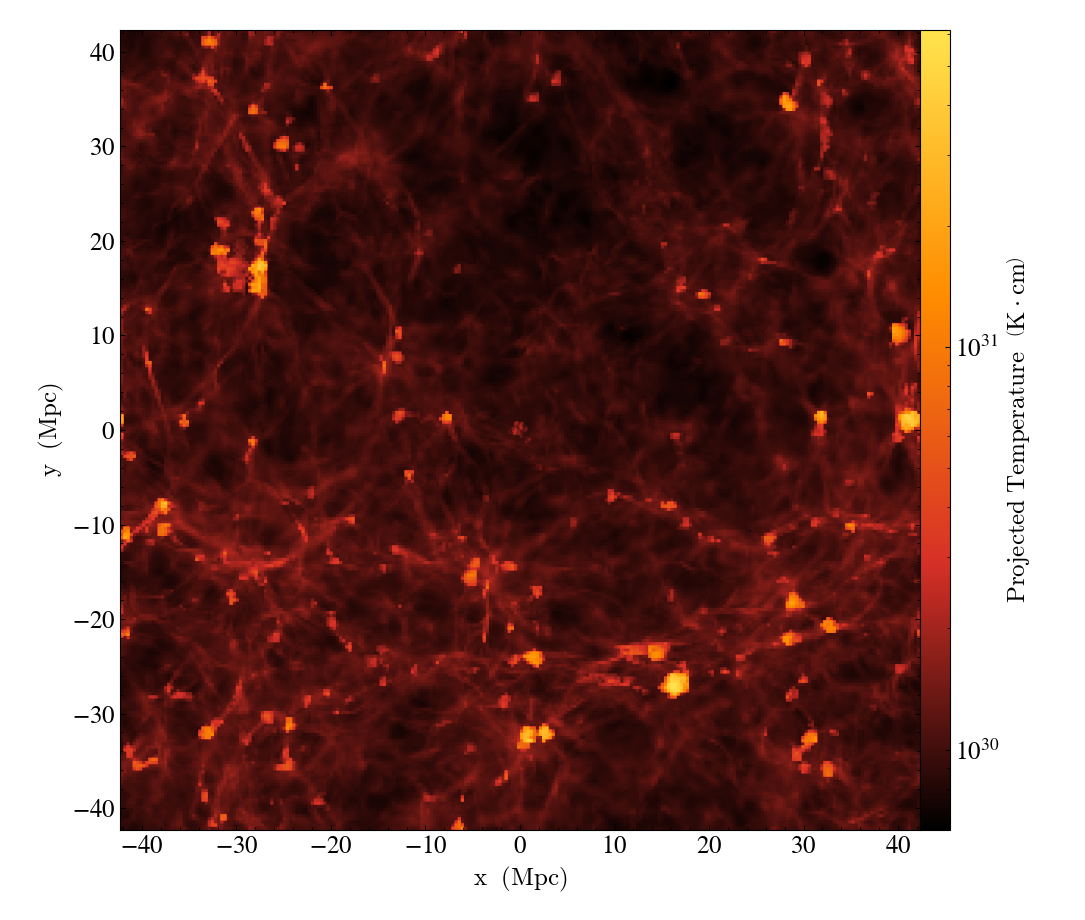

In [19]:
proj = yt.ProjectionPlot(ds,"z","temperature",center=ds.halo_center_kpc)
proj.set_cmap('temperature', temperature_color_map)

yt : [INFO     ] 2023-06-09 10:08:21,507 Projection completed
yt : [INFO     ] 2023-06-09 10:08:21,507 xlim = 41531.940201 41731.940201
yt : [INFO     ] 2023-06-09 10:08:21,508 ylim = 40536.535060 40736.535060
yt : [INFO     ] 2023-06-09 10:08:21,509 xlim = 0.490700 0.493063
yt : [INFO     ] 2023-06-09 10:08:21,510 ylim = 0.478939 0.481302
yt : [INFO     ] 2023-06-09 10:08:21,511 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



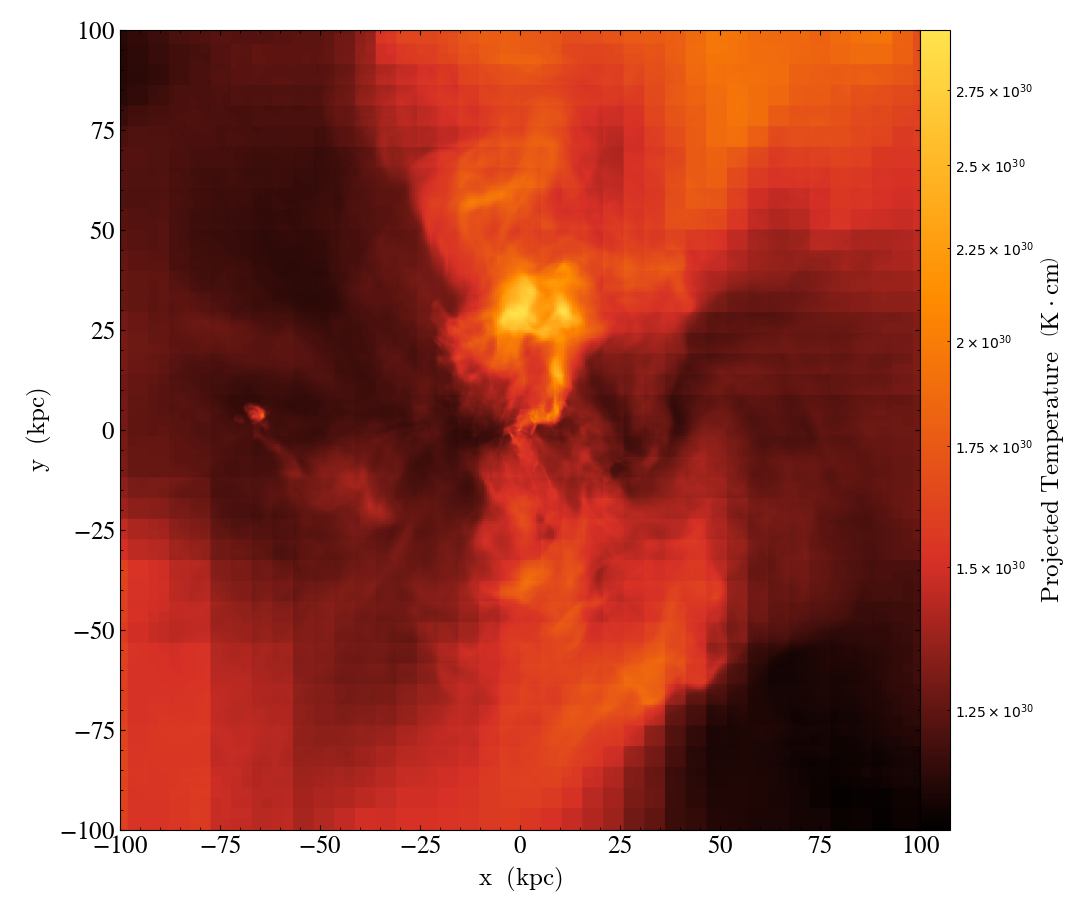

In [29]:
proj = yt.ProjectionPlot(ds,"z","temperature",center=ds.halo_center_kpc, width=(200.,"kpc"))
proj.set_cmap('temperature',temperature_color_map)

yt : [INFO     ] 2023-06-09 10:11:14,337 Projection completed
yt : [INFO     ] 2023-06-09 10:11:14,338 xlim = 41531.940201 41731.940201
yt : [INFO     ] 2023-06-09 10:11:14,339 ylim = 40536.535060 40736.535060
yt : [INFO     ] 2023-06-09 10:11:14,340 xlim = 0.490700 0.493063
yt : [INFO     ] 2023-06-09 10:11:14,341 ylim = 0.478939 0.481302
yt : [INFO     ] 2023-06-09 10:11:14,343 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



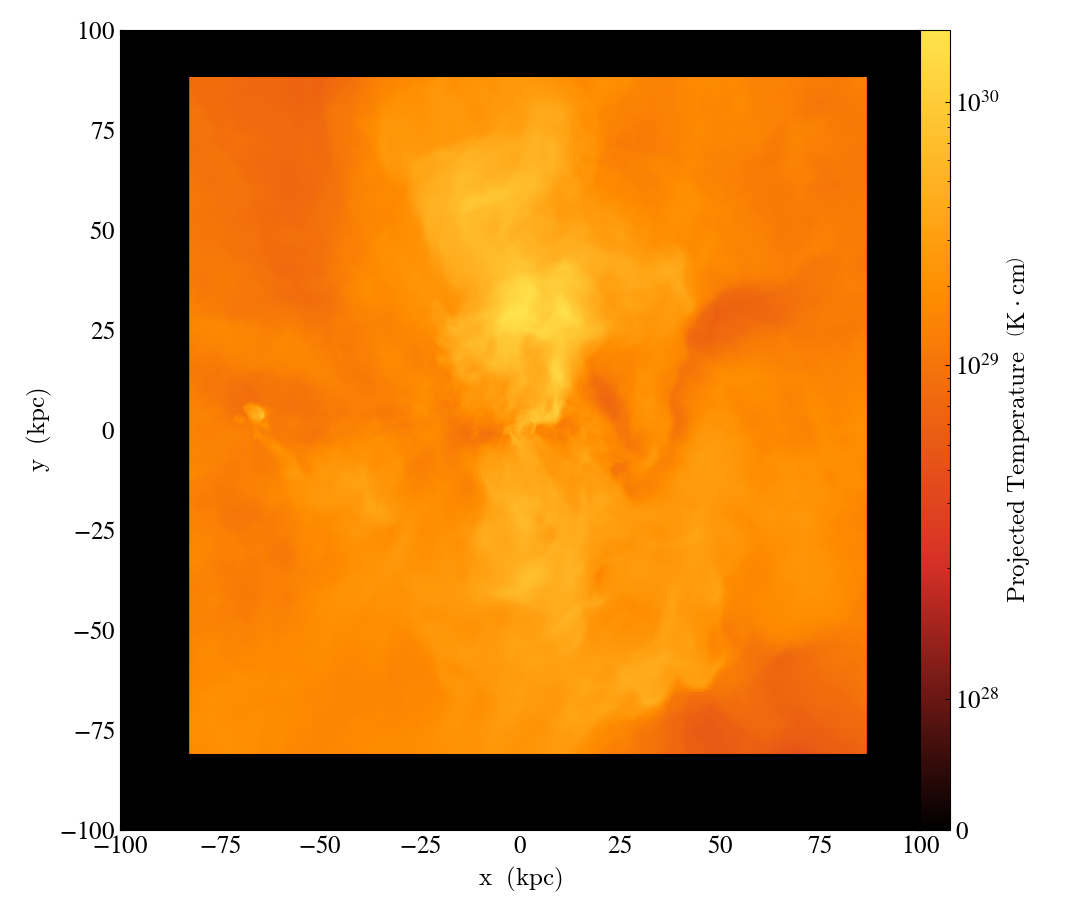

In [31]:
proj = yt.ProjectionPlot(ds,"z","temperature",center=ds.halo_center_kpc, width=(200., "kpc"), data_source=refine_box)
proj.set_cmap('temperature',temperature_color_map)

yt : [INFO     ] 2023-06-09 10:18:02,260 Projection completed
yt : [INFO     ] 2023-06-09 10:18:02,261 xlim = 41531.940201 41731.940201
yt : [INFO     ] 2023-06-09 10:18:02,262 ylim = 40536.535060 40736.535060
yt : [INFO     ] 2023-06-09 10:18:02,263 xlim = 0.490700 0.493063
yt : [INFO     ] 2023-06-09 10:18:02,264 ylim = 0.478939 0.481302
yt : [INFO     ] 2023-06-09 10:18:02,265 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



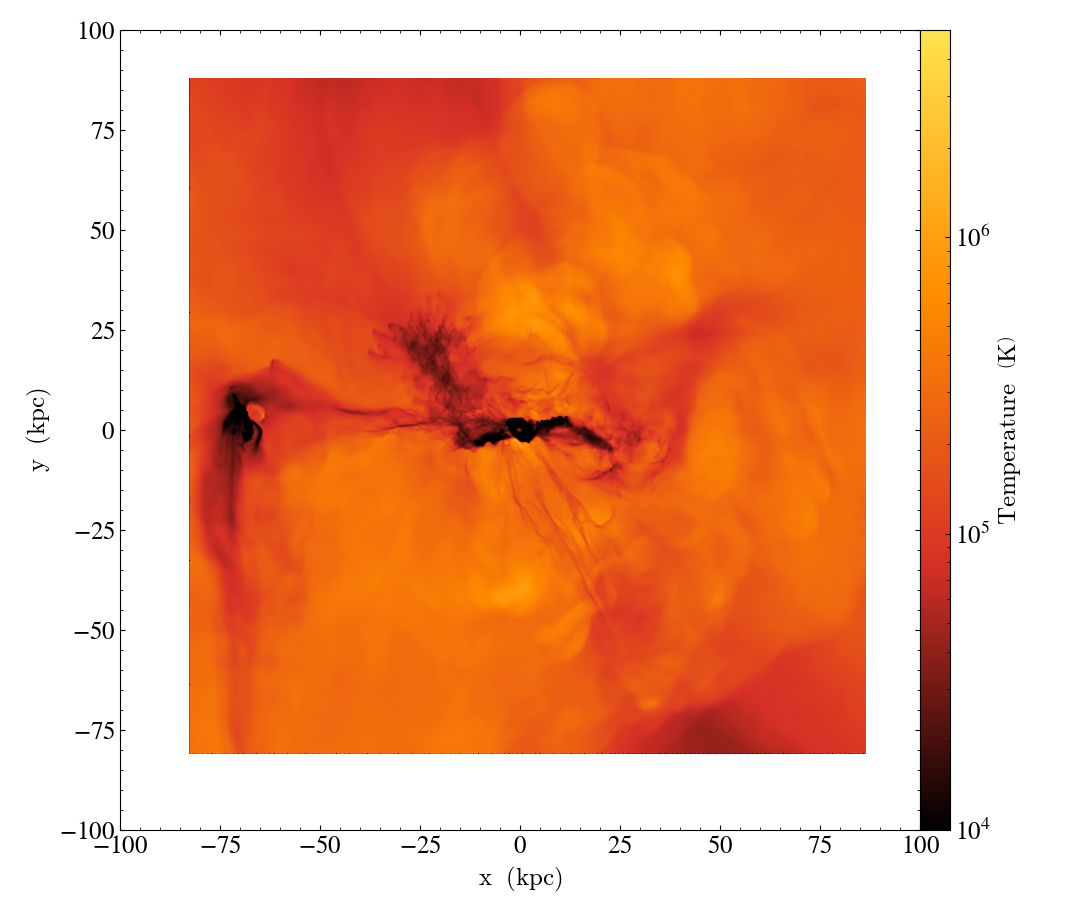

In [39]:
proj = yt.ProjectionPlot(ds,"z","temperature",center=ds.halo_center_kpc, width=(200., "kpc"), data_source=refine_box, weight_field='density')
proj.set_cmap('temperature',temperature_color_map)
proj.set_zlim('temperature',temperature_min,temperature_max)

In [44]:
yt

<module 'yt' from '/Users/hylee/anaconda3/lib/python3.10/site-packages/yt/__init__.py'>